**Importing libraries**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

**Import datasets**

In [2]:
titanic_train = pd.read_csv("train.csv")
titanic_test = pd.read_csv("test.csv")

**Explore datasets**

Let's take a look at the contents of the datasets :

In [3]:
titanic_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(titanic_train.shape)
print(titanic_test.shape)

(891, 12)
(418, 11)


The 'train.csv' dataset has 891 rows and 12 columns
The 'test.csv' dataset has 418 rows and 11 columns

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After looking at the results of the 2 previous calls we can observe that:
- there are missing values in the Age, Cabin and Embarked columns
- the type (int64, flot64, object) of each column matches the meaning of the column

Let's now look at the 'test.csv' dataset :

In [8]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

After looking at the results of the 2 previous calls we can observe that:
- **In the test.csv dataset, the Survived column is missing. As opposed to what we would expect, this dataset is not a testing dataset. As a result, we will have to extract the testing samples from the train.csv dataset instead. After training and testing the machine learning model, we can run it against the test.csv dataset to predict survivals for this specific dataset.**
- there are missing values in the Age, Cabin and Fare columns
- the type (int64, flot64, object) of each column matches the meaning of the column

Let's now get an idea of the number of unique values in each column for both datasets :

In [10]:
titanic_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [11]:
titanic_test.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

Let's look at the values of columns Survived, Parch, Pclass and SibSp in the train.csv dataset and confirm that they are consistent :

In [12]:
titanic_train.Survived.unique()

array([0, 1], dtype=int64)

In [13]:
titanic_train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [14]:
titanic_train.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [15]:
titanic_train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

Let's take a look at the statistical information of the columns Age and Fare of the train.csv dataset to get a better insight into the data and check that there are no obvious outliers :

In [16]:
titanic_train[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Let's look at the values of columns Parch, Pclass and SibSp in the test.csv dataset and confirm that they are consistent :

In [17]:
titanic_test.Parch.unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [18]:
titanic_test.Pclass.unique()

array([3, 2, 1], dtype=int64)

In [19]:
titanic_test.SibSp.unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

Let's take a look at the statistical information of the columns Age and Fare of the test.csv dataset to get a better insight into the data and check that there are no obvious outliers :

In [20]:
titanic_test[['Age','Fare']].describe()

,Age,Fare
count,332.000000,417.000000
mean,30.272590,35.627188
std,14.181209,55.907576
min,0.170000,0.000000
25%,21.000000,7.895800
50%,27.000000,14.454200
75%,39.000000,31.500000
max,76.000000,512.329200


**Cleaning**

We will be cleaning the train.csv dataset (used for training and testing) and the test.csv dataset.

Let's start first with the train.csv dataset

As there are few missing values in the Embarked column, we will impute the missing data with the name of the harbour where the majority of people embarked, namely 'Southampton' as shown in the plot below :

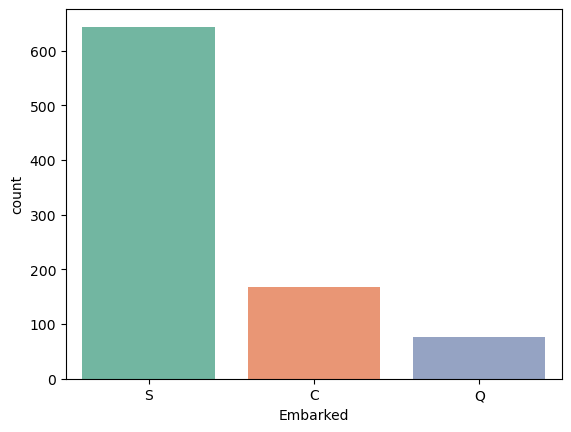

In [21]:
sns.countplot(x='Embarked', data=titanic_train, palette='Set2')
plt.show()

In [22]:
titanic_train["Embarked"].fillna(titanic_train['Embarked'].value_counts().idxmax(), inplace=True)

For column Age, we will replace the missing values with the age median : 

In [23]:
titanic_train["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)

As there are too many missing values in column Cabin we will drop it :

In [24]:
titanic_train.drop('Cabin', axis=1, inplace=True)

Let's now check if a passenger has either siblings, spouses, parents, or children aboard (sum of 'SibSp' and 'Parch' greater than 0). If so, value 0 is set in a new column named TravelAlone column. Otherwise, if the passenger is traveling alone, the value will be set to 1. We do that because the 2 columns SibSp an Parch convey similar information. We will actually drop these 2 columns to remove redundant data :

In [25]:
titanic_train['TravelAlone']=np.where((titanic_train["SibSp"]+titanic_train["Parch"])>0, 0, 1)
titanic_train.drop('SibSp', axis=1, inplace=True)
titanic_train.drop('Parch', axis=1, inplace=True)

Columns Embarked and Sex contain string values. It seems that the logistic regression model fails when using strings. As a result, we will use a trick well documented on the internet which kind of converts the strings into binaries. We also use this trick for column Pclass as continuous values 1, 2, 3 seem to confuse the algorithm and introduce some bias : 

In [26]:
titanic_train=pd.get_dummies(titanic_train, columns=["Pclass","Embarked","Sex"])

We drop the column Sex_female because it is redundant with column Sex_male

In [27]:
titanic_train.drop('Sex_female', axis=1, inplace=True)

We now drop the columns below because we consider they do not determine whether the person will survive or not

In [28]:
titanic_train.drop('PassengerId', axis=1, inplace=True)
titanic_train.drop('Name', axis=1, inplace=True)
titanic_train.drop('Ticket', axis=1, inplace=True)
titanic_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


Let's proceed with cleaning the test.csv dataset. This is similar to what we did for the train.csv dataset except that there is an issue with the Fare column rather than the Embarked column :

In [29]:
titanic_test["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)
titanic_test["Fare"].fillna(titanic_train["Fare"].median(skipna=True), inplace=True)
titanic_test.drop('Cabin', axis=1, inplace=True)

titanic_test['TravelAlone']=np.where((titanic_test["SibSp"]+titanic_test["Parch"])>0, 0, 1)

titanic_test.drop('SibSp', axis=1, inplace=True)
titanic_test.drop('Parch', axis=1, inplace=True)

titanic_test = pd.get_dummies(titanic_test, columns=["Pclass","Embarked","Sex"])
titanic_test.drop('Sex_female', axis=1, inplace=True)
titanic_test.drop('PassengerId', axis=1, inplace=True)
titanic_test.drop('Name', axis=1, inplace=True)
titanic_test.drop('Ticket', axis=1, inplace=True)

titanic_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


**Training**

Let's split the train.csv dataset into an input parameter set and an output classification set :

In [30]:
X = titanic_train.drop('Survived', axis=1)
y = titanic_train['Survived']

Let's split into a training set and an **actual** testing set (as a recall nothing to do with the test.csv dataset) : 

In [31]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

Let's build a model :

In [32]:
model = LogisticRegression(max_iter=400)

Let's train the model on the training set :

In [33]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

**Testing**

In [34]:
model.score(X_test,y_test)

0.7892376681614349

The score is relatively good. We will need to see if we can improve it later on

In [35]:
y_predict = model.predict(X_test)

Let's have a look at the confusion matrix to display the number of false positives and false negatives :

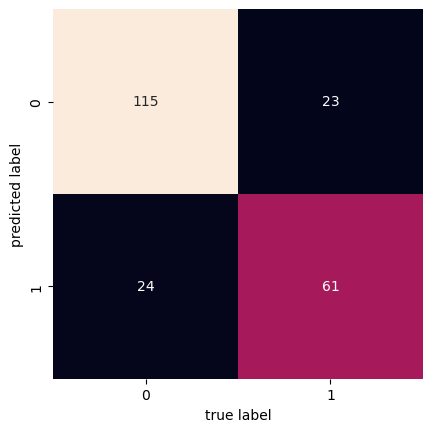

In [36]:
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat.T, square = True,annot=True,fmt='d',cbar=False,xticklabels=titanic_train['Survived'].unique(),yticklabels=titanic_train['Survived'].unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

**Improvement phase**

Let's test a number of different values for the hyperparameters. The selected values below for the hyper-parameters were found through trial and error and also by doing some search on the Internet

In [37]:
#param_grid = {'C':[1,5,10,50]}
#param_grid = {'C':[0.5,1,10,100]}
#param_grid = {'C': np.arange(1e-05, 3, 0.1), 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}
grid = GridSearchCV(model,param_grid)
%time grid.fit(X_train,y_train)
print(grid.best_params_)

CPU times: total: 5.05 s
Wall time: 3.06 s
{'C': 0.1, 'solver': 'newton-cg'}


Let's use the suggested hyper-parameter values : 

In [38]:
model = LogisticRegression(C=0.1, solver = 'newton-cg', max_iter=400)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=400, solver='newton-cg')

In [39]:
model.score(X_test,y_test)

0.8071748878923767

Small improvement observed !

In [40]:
y_predict = model.predict(X_test)

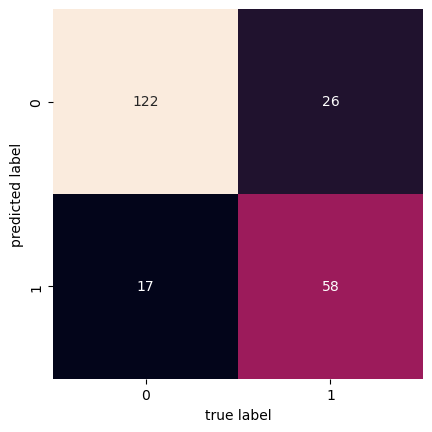

In [41]:
mat = confusion_matrix(y_test,y_predict)
sns.heatmap(mat.T, square = True,annot=True,fmt='d',cbar=False,xticklabels=titanic_train['Survived'].unique(),yticklabels=titanic_train['Survived'].unique())
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Now that we have trained the model and tested it let's run it on the 'test.csv' dataset to get a prediction

In [42]:
survived = model.predict(titanic_test)

In [43]:
survived.shape

(418,)

In [44]:
titanic_test['Survived'] = survived

In [45]:
titanic_test.head(20)

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,Survived
0,34.5,7.8292,1,0,0,1,0,1,0,1,0
1,47.0,7.0000,0,0,0,1,0,0,1,0,0
2,62.0,9.6875,1,0,1,0,0,1,0,1,0
3,27.0,8.6625,1,0,0,1,0,0,1,1,0
4,22.0,12.2875,0,0,0,1,0,0,1,0,1
5,14.0,9.2250,1,0,0,1,0,0,1,1,0
6,30.0,7.6292,1,0,0,1,0,1,0,0,1
7,26.0,29.0000,0,0,1,0,0,0,1,1,0
8,18.0,7.2292,1,0,0,1,1,0,0,0,1
9,21.0,24.1500,0,0,0,1,0,0,1,1,0


**Saving the model**

Let's save the model in a file :

In [46]:
from joblib import dump, load
dump(model, 'model_titanic.joblib') 

['model_titanic.joblib']

Let's test that the saved model is OK :

In [47]:
model_2 = load('model_titanic.joblib') 

In [48]:
model_2.fit(X_train,y_train)

LogisticRegression(C=0.1, max_iter=400, solver='newton-cg')

In [49]:
model_2.score(X_test,y_test )

0.8071748878923767